<a href="https://colab.research.google.com/github/Daniel-inga/Projeto_Frexco/blob/main/Projeto_Frexco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Importando as bibliotecas utilizadas
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.express as px
from prophet.plot import plot_plotly

#Leitura da base de dados
df= pd.read_excel("https://drive.google.com/u/3/uc?id=1aQdqLd3F77_htuLL2EOLOVhH9PUuOco4&export=download")


In [8]:
#Visualização da tabela e de suas informações
df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317
5,2022-12-11,685
6,2022-12-12,1366
7,2022-12-13,1213
8,2022-12-14,1055
9,2022-12-15,1343


In [9]:
#Visualização do gráfico
grafico =  px.line( df ,  x = 'Data' ,  y = "Vendas", title= "Vendas x Dia" )
grafico.show()

In [10]:
#Criação de uma função para melhorar a formatação do valor de vendas
def formatar(valor):
  return "{:.1f}".format(valor)
#Aplicando a função
df["Vendas"]=df["Vendas"].astype(float)
df["Vendas"]=df["Vendas"].apply(formatar)
df

,Data,Vendas
0,2022-12-06,870.0
1,2022-12-07,868.0
2,2022-12-08,1189.0
3,2022-12-09,742.0
4,2022-12-10,317.0
5,2022-12-11,685.0
6,2022-12-12,1366.0
7,2022-12-13,1213.0
8,2022-12-14,1055.0
9,2022-12-15,1343.0


In [11]:
#Alterar o nome das colunas para ser compatível com o prophet
df.columns=["ds", "y"]
df

,ds,y
0,2022-12-06,870.0
1,2022-12-07,868.0
2,2022-12-08,1189.0
3,2022-12-09,742.0
4,2022-12-10,317.0
5,2022-12-11,685.0
6,2022-12-12,1366.0
7,2022-12-13,1213.0
8,2022-12-14,1055.0
9,2022-12-15,1343.0


In [12]:
#Criação de um modelo
modelo = Prophet()
modelo.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7f17enbj/vsuppk9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7f17enbj/ympu7v_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95583', 'data', 'file=/tmp/tmp7f17enbj/vsuppk9q.json', 'init=/tmp/tmp7f17enbj/ympu7v_h.json', 'output', 'file=/tmp/tmp7f17enbj/prophet_modelfozkh5hx/prophet_model-20230201185340.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:53:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:53:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
#Criação de um dataframe com as datas do período da previsão (obs: 5 dias)
futuro = pd.date_range(start="2023-01-21", end="2023-01-25")

df_fut= pd.DataFrame(futuro)
df_fut.columns=["ds"]
df_fut

,ds
0,2023-01-21
1,2023-01-22
2,2023-01-23
3,2023-01-24
4,2023-01-25


In [14]:
#Fazer a previsão e visualizar os dados
prev = modelo.predict(df_fut)
prev 


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-21,830.241187,-20.923327,619.727569,830.239232,830.242938,-530.856433,-530.856433,-530.856433,-530.856433,-530.856433,-530.856433,0.0,0.0,0.0,299.384754
1,2023-01-22,833.928638,99.330284,735.939908,833.922412,833.934204,-408.666228,-408.666228,-408.666228,-408.666228,-408.666228,-408.666228,0.0,0.0,0.0,425.262410
2,2023-01-23,837.616090,954.408323,1626.509731,837.603597,837.627859,428.764541,428.764541,428.764541,428.764541,428.764541,428.764541,0.0,0.0,0.0,1266.380631
3,2023-01-24,841.303542,617.276966,1269.921723,841.284355,841.323009,110.991341,110.991341,110.991341,110.991341,110.991341,110.991341,0.0,0.0,0.0,952.294883
4,2023-01-25,844.990993,664.437491,1275.078531,844.963598,845.019216,119.479844,119.479844,119.479844,119.479844,119.479844,119.479844,0.0,0.0,0.0,964.470838


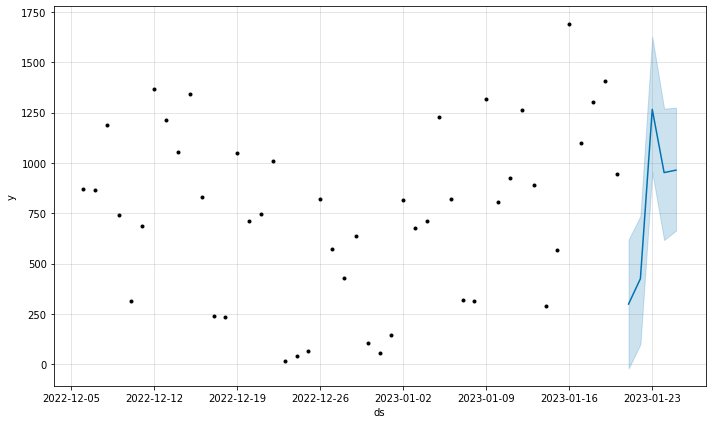

In [15]:
#Gráfico dos valores de venda reais e a continuação com os valores previstos
modelo.plot(prev)
plt.show()

In [16]:
#Criando uma tabela com as informações mais importantes da previsão dos próximos 5 dias
df_prev= prev[["ds", "yhat", "yhat_upper", "yhat_lower"]]
#Formatando os valores para melhorar a visualizção
df_prev["yhat"]=df_prev["yhat"].apply(formatar)
df_prev["yhat_upper"]=df_prev["yhat_upper"].apply(formatar)
df_prev["yhat_lower"]=df_prev["yhat_lower"].apply(formatar)
df_prev

<ipython-input-16-9bd74186d389>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-9bd74186d389>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-9bd74186d389>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,yhat,yhat_upper,yhat_lower
0,2023-01-21,299.4,619.7,-20.9
1,2023-01-22,425.3,735.9,99.3
2,2023-01-23,1266.4,1626.5,954.4
3,2023-01-24,952.3,1269.9,617.3
4,2023-01-25,964.5,1275.1,664.4


In [19]:
#Plotar um gráfico para melhorar a visualização
plot_plotly(modelo, df_prev)

**Conclusão**
Os valores para a previsão de vendas nos últimos 5 dias são representados por "yhat" como pode ser observado pela tabela abaixo.

**Observação**
Os valores "yhat_lower" e "yhat_upper" representam o intervalo com uma possível margem de erro para a previsão.

In [22]:
df_yhat= prev[["ds", "yhat"]]
df_yhat

,ds,yhat
0,2023-01-21,299.384754
1,2023-01-22,425.262410
2,2023-01-23,1266.380631
3,2023-01-24,952.294883
4,2023-01-25,964.470838
